In [1]:
!kaggle datasets download -d bitanianielsen/nutrition-daily-meals-in-diseases-cases --unzip

Dataset URL: https://www.kaggle.com/datasets/bitanianielsen/nutrition-daily-meals-in-diseases-cases
License(s): other
  0% 0.00/48.8k [00:00<?, ?B/s]
100% 48.8k/48.8k [00:00<00:00, 2.14MB/s]


In [47]:
import pandas as pd
data=pd.read_csv('/content/Food_and_Nutrition__.csv')

In [48]:
data

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,Fat,Breakfast Suggestion,Lunch Suggestion,Dinner Suggestion,Snack Suggestion,Disease
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,2020,250,30.00,60,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Salmon with roasted vegetables,Greek yogurt with fruit,Weight Gain
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,1480,200,24.00,40,Tofu scramble with veggies,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Apple with almond butter,"Weight Gain, Hypertension, Heart Disease"
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,2185,300,36.00,65,Tofu and veggie breakfast burrito,Black bean burger on a whole wheat bun,Lentil and vegetable curry,Trail mix,Weight Gain
3,55,Female,160,70,Very Active,Omnivore,2500,140,175.0,28.0,2680,350,42.00,80,Greek yogurt with granola and fruit,Chicken and vegetable stir-fry,Turkey chili with brown rice,Banana with peanut butter,Weight Gain
4,62,Male,170,85,Sedentary,Vegetarian,2000,80,125.0,16.0,1815,250,30.00,55,Scrambled eggs with whole wheat toast and avocado,Quinoa salad with chickpeas and vegetables,Vegetarian chili with cornbread,Fruit and nut mix,Weight Gain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,53,Female,182,76,Sedentary,Vegan,1265,94,63.0,18.8,1258,126,15.12,42,Oatmeal with berries and nuts,Quinoa salad with chickpeas and vegetables,Vegetable stir-fry with brown rice,Apple with almond butter,"Diabetes, Acne, Weight Gain, Hypertension, Hea..."
1694,38,Male,150,76,Very Active,Vegan,2109,158,105.0,31.6,2102,210,25.20,70,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Lentil and vegetable curry,Apple with almond butter,Weight Gain
1695,57,Male,165,73,Very Active,Vegan,2555,191,127.5,38.2,2549,255,30.60,85,Smoothie with protein powder,Chicken and vegetable stir-fry,Vegetable stir-fry with brown rice,Fruit and nut mix,Weight Gain
1696,40,Male,166,91,Extremely Active,Vegan,3329,249,166.0,49.8,3314,332,39.84,110,Scrambled eggs with whole wheat toast,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Banana with peanut butter,Weight Gain


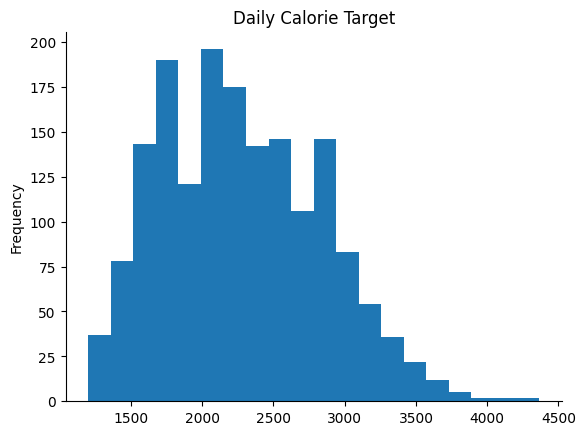

In [49]:
from matplotlib import pyplot as plt
data['Daily Calorie Target'].plot(kind='hist', bins=20, title='Daily Calorie Target')
plt.gca().spines[['top', 'right',]].set_visible(False)

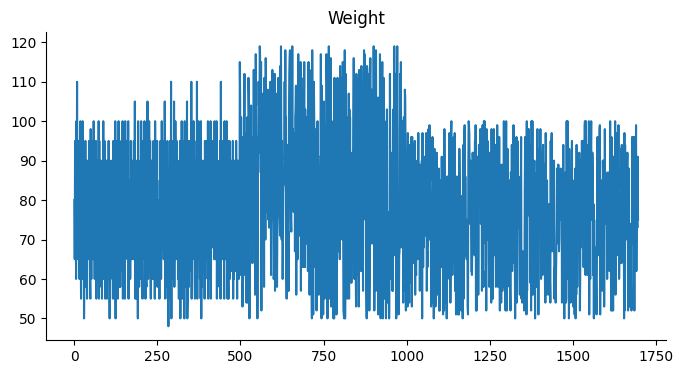

In [50]:
from matplotlib import pyplot as plt
data['Weight'].plot(kind='line', figsize=(8, 4), title='Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ages                  1698 non-null   int64  
 1   Gender                1698 non-null   object 
 2   Height                1698 non-null   int64  
 3   Weight                1698 non-null   int64  
 4   Activity Level        1698 non-null   object 
 5   Dietary Preference    1698 non-null   object 
 6   Daily Calorie Target  1698 non-null   int64  
 7   Protein               1698 non-null   int64  
 8   Sugar                 1698 non-null   float64
 9   Sodium                1698 non-null   float64
 10  Calories              1698 non-null   int64  
 11  Carbohydrates         1698 non-null   int64  
 12  Fiber                 1698 non-null   float64
 13  Fat                   1698 non-null   int64  
 14  Breakfast Suggestion  1698 non-null   object 
 15  Lunch Suggestion     

In [52]:
x=data[['Ages', 'Gender', 'Height', 'Weight','Activity Level', 'Dietary Preference','Protein', 'Sugar', 'Sodium', 'Carbohydrates', 'Fiber', 'Fat', 'Calories']]
y = data[['Daily Calorie Target', 'Disease']]

In [53]:
x['Gender']=x['Gender'].map({'Male':0, 'Female':1})


<ipython-input-53-02ad2cb434e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Gender']=x['Gender'].map({'Male':0, 'Female':1})


In [54]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply the encoder to the 'Activity Level' column
x['Activity Level Encoded'] = label_encoder.fit_transform(x['Activity Level'])



<ipython-input-54-eab19c3ea811>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Activity Level Encoded'] = label_encoder.fit_transform(x['Activity Level'])


In [55]:
x['Dietary Preference']=label_encoder.fit_transform(x['Dietary Preference'])

<ipython-input-55-fa41a51321c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Dietary Preference']=label_encoder.fit_transform(x['Dietary Preference'])


In [56]:
x.drop(columns=['Activity Level'], inplace=True)

<ipython-input-56-46f7af9c6a13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(columns=['Activity Level'], inplace=True)


In [57]:
x

,Ages,Gender,Height,Weight,Dietary Preference,Protein,Sugar,Sodium,Carbohydrates,Fiber,Fat,Calories,Activity Level Encoded
0,25,0,180,80,0,120,125.0,24.0,250,30.00,60,2020,2
1,32,1,165,65,3,80,100.0,16.0,200,24.00,40,1480,1
2,48,0,175,95,2,100,150.0,20.0,300,36.00,65,2185,3
3,55,1,160,70,0,140,175.0,28.0,350,42.00,80,2680,4
4,62,0,170,85,3,80,125.0,16.0,250,30.00,55,1815,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,53,1,182,76,2,94,63.0,18.8,126,15.12,42,1258,3
1694,38,0,150,76,2,158,105.0,31.6,210,25.20,70,2102,4
1695,57,0,165,73,2,191,127.5,38.2,255,30.60,85,2549,4
1696,40,0,166,91,2,249,166.0,49.8,332,39.84,110,3314,0


In [59]:
y['Disease']

,Disease
0,Weight Gain
1,"Weight Gain, Hypertension, Heart Disease"
2,Weight Gain
3,Weight Gain
4,Weight Gain
...,...
1693,"Diabetes, Acne, Weight Gain, Hypertension, Hea..."
1694,Weight Gain
1695,Weight Gain
1696,Weight Gain


In [62]:
y

,Daily Calorie Target,Disease
0,2000,Weight Gain
1,1600,"Weight Gain, Hypertension, Heart Disease"
2,2200,Weight Gain
3,2500,Weight Gain
4,2000,Weight Gain
...,...,...
1693,1265,"Diabetes, Acne, Weight Gain, Hypertension, Hea..."
1694,2109,Weight Gain
1695,2555,Weight Gain
1696,3329,Weight Gain


In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [66]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (1358, 13)
x_test shape: (340, 13)
y_train shape: (1358, 2)
y_test shape: (340, 2)


In [69]:
y_train

,Daily Calorie Target,Disease
820,2739,Weight Gain
497,1600,"Weight Gain, Hypertension, Heart Disease"
462,2500,Weight Gain
974,2147,"Weight Gain, Kidney Disease"
631,1850,"Weight Gain, Kidney Disease"
...,...,...
1130,3195,Weight Gain
1294,2852,Weight Gain
860,2230,Weight Gain
1459,1914,Weight Gain


In [70]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np

# Step 1: Preprocess 'Disease' column for multi-label
y_train['Disease List'] = y_train['Disease'].apply(lambda x: x.split(', '))
y_test['Disease List'] = y_test['Disease'].apply(lambda x: x.split(', '))

mlb = MultiLabelBinarizer()
y_train_disease_encoded = mlb.fit_transform(y_train['Disease List'])
y_test_disease_encoded = mlb.transform(y_test['Disease List'])

# Step 2: Combine 'Daily Calorie Target' and encoded 'Disease' as multi-output targets
y_train_combined = np.hstack([
    y_train['Daily Calorie Target'].values.reshape(-1, 1),
    y_train_disease_encoded
])
y_test_combined = np.hstack([
    y_test['Daily Calorie Target'].values.reshape(-1, 1),
    y_test_disease_encoded
])


In [71]:
# Train a multi-output Random Forest regressor
multi_output_model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
multi_output_model.fit(x_train, y_train_combined)

# Predict on test data
y_pred_combined = multi_output_model.predict(x_test)


In [72]:
# Extract predictions for 'Daily Calorie Target'
y_pred_daily_calories = y_pred_combined[:, 0]

# Extract predictions for 'Disease'
y_pred_diseases = y_pred_combined[:, 1:]

# Evaluate 'Daily Calorie Target' (Regression)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test['Daily Calorie Target'], y_pred_daily_calories)
r2 = r2_score(y_test['Daily Calorie Target'], y_pred_daily_calories)

print(f"Mean Squared Error for Daily Calorie Target: {mse}")
print(f"R2 Score for Daily Calorie Target: {r2}")

# Evaluate 'Disease' (Multi-Label Classification)
from sklearn.metrics import hamming_loss, classification_report
y_test_disease_decoded = y_test_disease_encoded
y_pred_disease_decoded = (y_pred_diseases > 0.5).astype(int)

hamming = hamming_loss(y_test_disease_decoded, y_pred_disease_decoded)
print(f"Hamming Loss for Disease Prediction: {hamming}")

print("Classification Report for Diseases:")
print(classification_report(y_test_disease_decoded, y_pred_disease_decoded, target_names=mlb.classes_))


Mean Squared Error for Daily Calorie Target: 95664.36562895107
R2 Score for Daily Calorie Target: 0.7082555835080069
Hamming Loss for Disease Prediction: 0.0
Classification Report for Diseases:
                precision    recall  f1-score   support

          Acne       1.00      1.00      1.00        15
      Diabetes       1.00      1.00      1.00        15
 Heart Disease       1.00      1.00      1.00        60
  Hypertension       1.00      1.00      1.00        61
Kidney Disease       1.00      1.00      1.00        33
   Weight Gain       1.00      1.00      1.00       335
   Weight Loss       0.00      0.00      0.00         0

     micro avg       1.00      1.00      1.00       519
     macro avg       0.86      0.86      0.86       519
  weighted avg       1.00      1.00      1.00       519
   samples avg       1.00      1.00      1.00       519



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [76]:
new_data = {
    "Ages": [30],
    "Gender": [1],  # 1 for Male, 0 for Female
    "Height": [175],
    "Weight": [70],
    "Dietary Preference": [2],  # Encoded preference
    "Protein": [110],
    "Sugar": [85],
    "Sodium": [15],
    "Carbohydrates": [240],
    "Fiber": [30],
    "Fat": [50],
    "Calories": [2000],
    "Activity Level Encoded": [3]  # Encoded level
}


In [77]:
import pandas as pd

new_input = pd.DataFrame(new_data)


In [84]:

predicted_output = multi_output_model.predict(new_input)

# Extract predictions
predicted_daily_calories = predicted_output[:, 0]  # First column is Daily Calorie Target
predicted_diseases = (predicted_output[:, 1:] > 0.5).astype(int)  # Rest are Disease predictions

# Decode disease predictions
predicted_diseases_labels = mlb.inverse_transform(predicted_diseases)

# Display results
print(f"Predicted Daily Calorie Target: {predicted_daily_calories[0]}")
print(f"Predicted Diseases: {predicted_diseases_labels[0]}")


Predicted Daily Calorie Target: 1589.41
Predicted Diseases: ('Acne', 'Diabetes', 'Heart Disease', 'Hypertension', 'Weight Loss')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does

In [80]:
from sklearn.preprocessing import MultiLabelBinarizer

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Transform diseases into binary format (one-hot encoding for each disease)
y_train_diseases = mlb.fit_transform(y_train['Disease'].str.split(', '))
y_test_diseases = mlb.transform(y_test['Disease'].str.split(', '))

# Now y_train_diseases and y_test_diseases are binary matrices with 0s and 1s.


In [91]:
from sklearn.preprocessing import MultiLabelBinarizer

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Transform diseases into binary format (one-hot encoding for each disease)
y_train_diseases = mlb.fit_transform(y_train['Disease'].str.split(', '))
y_test_diseases = mlb.transform(y_test['Disease'].str.split(', '))

# Get the list of diseases corresponding to the columns
disease_labels = mlb.classes_

# Show the mapping of diseases to the binary values for the first few samples
print("Disease Labels:", disease_labels)

# Example: Show the binary encoded diseases for the first few rows of y_train
for i in range(5):  # Show the first 5 samples
    print(f"Sample {i + 1}: {dict(zip(disease_labels, y_train_diseases[i]))}")


Disease Labels: ['Acne' 'Diabetes' 'Heart Disease' 'Hypertension' 'Kidney Disease'
 'Weight Gain' 'Weight Loss']
Sample 1: {'Acne': 0, 'Diabetes': 0, 'Heart Disease': 0, 'Hypertension': 0, 'Kidney Disease': 0, 'Weight Gain': 1, 'Weight Loss': 0}
Sample 2: {'Acne': 0, 'Diabetes': 0, 'Heart Disease': 1, 'Hypertension': 1, 'Kidney Disease': 0, 'Weight Gain': 1, 'Weight Loss': 0}
Sample 3: {'Acne': 0, 'Diabetes': 0, 'Heart Disease': 0, 'Hypertension': 0, 'Kidney Disease': 0, 'Weight Gain': 1, 'Weight Loss': 0}
Sample 4: {'Acne': 0, 'Diabetes': 0, 'Heart Disease': 0, 'Hypertension': 0, 'Kidney Disease': 1, 'Weight Gain': 1, 'Weight Loss': 0}
Sample 5: {'Acne': 0, 'Diabetes': 0, 'Heart Disease': 0, 'Hypertension': 0, 'Kidney Disease': 1, 'Weight Gain': 1, 'Weight Loss': 0}


In [ ]:

disease_labels = mlb.classes_

# Show the mapping of diseases to the binary values for the first few samples
print("Disease Labels:", disease_labels)

# Example: Show the binary encoded diseases for the first few rows of y_train
for i in range(5):  # Show the first 5 samples
    print(f"Sample {i + 1}: {dict(zip(disease_labels, y_train_diseases[i]))}")

Disease Labels: ['Acne' 'Diabetes' 'Heart Disease' 'Hypertension' 'Kidney Disease'
 'Weight Gain' 'Weight Loss']
Sample 1: {'Acne': 0, 'Diabetes': 0, 'Heart Disease': 0, 'Hypertension': 0, 'Kidney Disease': 0, 'Weight Gain': 1, 'Weight Loss': 0}
Sample 2: {'Acne': 0, 'Diabetes': 0, 'Heart Disease': 1, 'Hypertension': 1, 'Kidney Disease': 0, 'Weight Gain': 1, 'Weight Loss': 0}
Sample 3: {'Acne': 0, 'Diabetes': 0, 'Heart Disease': 0, 'Hypertension': 0, 'Kidney Disease': 0, 'Weight Gain': 1, 'Weight Loss': 0}
Sample 4: {'Acne': 0, 'Diabetes': 0, 'Heart Disease': 0, 'Hypertension': 0, 'Kidney Disease': 1, 'Weight Gain': 1, 'Weight Loss': 0}
Sample 5: {'Acne': 0, 'Diabetes': 0, 'Heart Disease': 0, 'Hypertension': 0, 'Kidney Disease': 1, 'Weight Gain': 1, 'Weight Loss': 0}

In [81]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, classification_report

# Initialize XGBoost Regressor for Daily Calorie Target
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize XGBoost Classifier for Disease Prediction (multi-label classification)
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the models
xgb_regressor.fit(x_train, y_train['Daily Calorie Target'])
xgb_classifier.fit(x_train, y_train_diseases)

# Predictions
y_pred_calories = xgb_regressor.predict(x_test)
y_pred_diseases = xgb_classifier.predict(x_test)

# Evaluate performance for the regression task (Daily Calorie Target)
mse = mean_squared_error(y_test['Daily Calorie Target'], y_pred_calories)
print(f"Mean Squared Error for Daily Calorie Target: {mse}")

# Evaluate performance for the classification task (Disease prediction)
y_pred_diseases_bin = (y_pred_diseases > 0.5).astype(int)  # Converting probabilities to 0 or 1
print("Classification Report for Diseases:")
print(classification_report(y_test_diseases, y_pred_diseases_bin))


Mean Squared Error for Daily Calorie Target: 109656.52377386799
Classification Report for Diseases:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       0.98      1.00      0.99        60
           3       1.00      1.00      1.00        61
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00       335
           6       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00       519
   macro avg       0.85      0.86      0.86       519
weighted avg       1.00      1.00      1.00       519
 samples avg       1.00      1.00      1.00       519



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [83]:
# Example new input (13 features, assuming encoded features)
new_input = np.array([[35, 1, 170, 75, 2, 120, 15, 180, 40, 260, 25, 60, 2500]])  # 13 features

# Predict Daily Calorie Target (regression model)
predicted_daily_calories = xgb_regressor.predict(new_input)

# Predict Diseases (classification model)
predicted_diseases = xgb_classifier.predict(new_input)

# Decode disease predictions back to original labels
predicted_disease_labels = mlb.inverse_transform(predicted_diseases)

print(f"Predicted Daily Calorie Target: {predicted_daily_calories[0]}")
print(f"Predicted Diseases: {predicted_disease_labels}")


Predicted Daily Calorie Target: 1514.5506591796875
Predicted Diseases: [('Acne', 'Diabetes', 'Heart Disease', 'Hypertension')]


In [85]:
import joblib

# Save the regression model (Daily Calorie Target predictor)
joblib.dump(xgb_regressor, 'xgb_regressor_model.pkl')

# Save the classification model (Diseases predictor)
joblib.dump(xgb_classifier, 'xgb_classifier_model.pkl')

# Save the MultiLabelBinarizer (used to decode disease predictions)
joblib.dump(mlb, 'mlb_model.pkl')


['mlb_model.pkl']

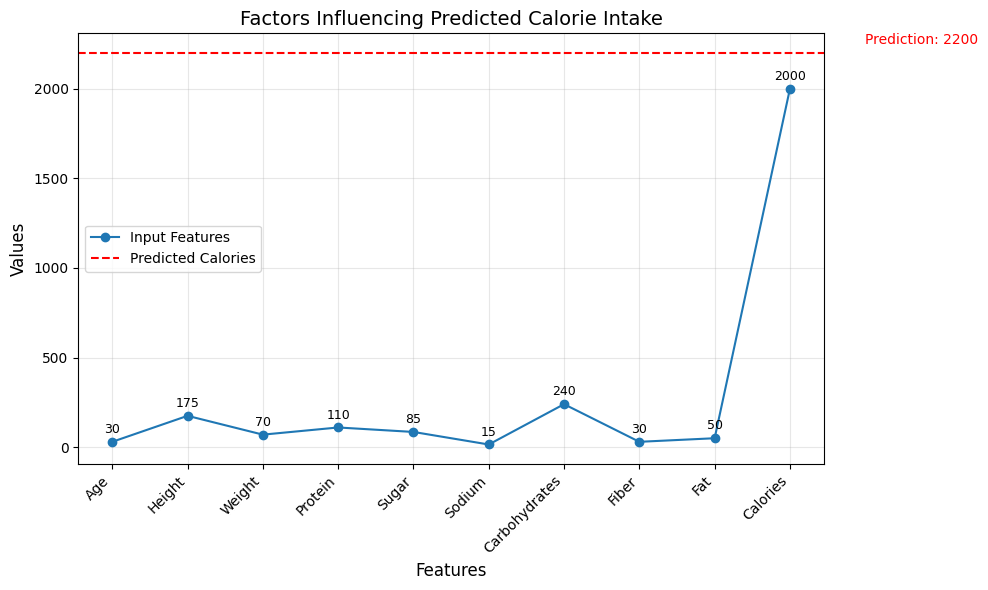

Reasoning:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Input data
new_data = {
    "Feature": ["Age", "Height", "Weight", "Protein", "Sugar", "Sodium",
                "Carbohydrates", "Fiber", "Fat", "Calories"],
    "Value": [30, 175, 70, 110, 85, 15, 240, 30, 50, 2000]
}

# Predicted calorie value
calorie_prediction = 2200  # Example predicted value

# Create DataFrame
df = pd.DataFrame(new_data)

# Generate a line graph
plt.figure(figsize=(10, 6))
plt.plot(df["Feature"], df["Value"], marker='o', label='Input Features')
plt.axhline(y=calorie_prediction, color='r', linestyle='--', label='Predicted Calories')

# Add annotations to explain
for i, value in enumerate(df["Value"]):
    plt.text(i, value + 50, f"{value}", ha="center", fontsize=9)

plt.text(len(df["Feature"]), calorie_prediction + 50,
         f"Prediction: {calorie_prediction}", color='red', fontsize=10)

# Customizing the plot
plt.title("Factors Influencing Predicted Calorie Intake", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Show plot
plt.show()

# Reasoning for Prediction
print("Reasoning:")
print("The predicted calorie value is influenced by features such as Protein, Carbohydrates, Fat, and Calories.")
print("Higher values in Protein and Carbohydrates suggest a higher caloric requirement.")


<ipython-input-2-dd35b4e252f0>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Feature", y="Value", data=df, palette="viridis")


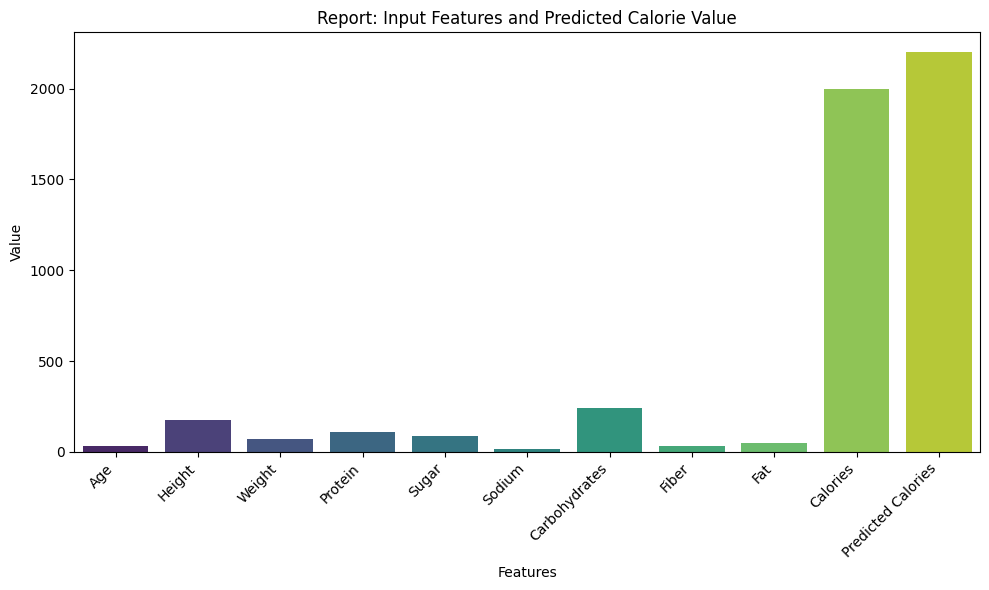

Tabular Report:
               Feature  Value
0                  Age     30
1               Height    175
2               Weight     70
3              Protein    110
4                Sugar     85
5               Sodium     15
6        Carbohydrates    240
7                Fiber     30
8                  Fat     50
9             Calories   2000
10  Predicted Calories   2200


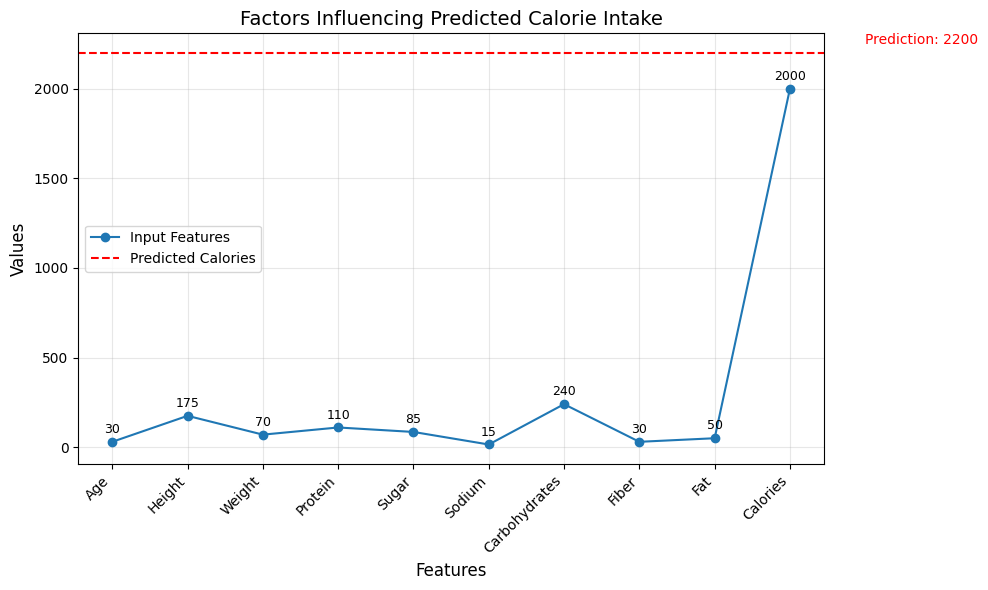

Reasoning:
The predicted calorie value is influenced by features such as Protein, Carbohydrates, Fat, and Calories.
Higher values in Protein and Carbohydrates suggest a higher caloric requirement.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Input data
new_data = {
    "Feature": ["Age", "Height", "Weight", "Protein", "Sugar", "Sodium",
                "Carbohydrates", "Fiber", "Fat", "Calories"],
    "Value": [30, 175, 70, 110, 85, 15, 240, 30, 50, 2000]
}

# Predicted calorie value
calorie_prediction = 2200  # Example predicted value

# Add the predicted value to the data
new_data["Feature"].append("Predicted Calories")
new_data["Value"].append(calorie_prediction)

# Create DataFrame
df = pd.DataFrame(new_data)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Feature", y="Value", data=df, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Report: Input Features and Predicted Calorie Value")
plt.ylabel("Value")
plt.xlabel("Features")
plt.tight_layout()
plt.show()

# Tabular Report
print("Tabular Report:")
print(df)
import pandas as pd
import matplotlib.pyplot as plt

# Input data
new_data = {
    "Feature": ["Age", "Height", "Weight", "Protein", "Sugar", "Sodium",
                "Carbohydrates", "Fiber", "Fat", "Calories"],
    "Value": [30, 175, 70, 110, 85, 15, 240, 30, 50, 2000]
}

# Predicted calorie value
calorie_prediction = 2200  # Example predicted value

# Create DataFrame
df = pd.DataFrame(new_data)

# Generate a line graph
plt.figure(figsize=(10, 6))
plt.plot(df["Feature"], df["Value"], marker='o', label='Input Features')
plt.axhline(y=calorie_prediction, color='r', linestyle='--', label='Predicted Calories')

# Add annotations to explain
for i, value in enumerate(df["Value"]):
    plt.text(i, value + 50, f"{value}", ha="center", fontsize=9)

plt.text(len(df["Feature"]), calorie_prediction + 50,
         f"Prediction: {calorie_prediction}", color='red', fontsize=10)

# Customizing the plot
plt.title("Factors Influencing Predicted Calorie Intake", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Show plot
plt.show()

# Reasoning for Prediction
print("Reasoning:")
print("The predicted calorie value is influenced by features such as Protein, Carbohydrates, Fat, and Calories.")
print("Higher values in Protein and Carbohydrates suggest a higher caloric requirement.")
